### PEQUENO TESTE 05

Este teste aborta o Método da Penalidade Exterior. O problema de otimização
abordado é o seguinte:

    Minimizar f(x) = (x1-1)^2 + (x2-5)^2
    Sujeito a:
        g1(x) = -x1^2 + x2 - 4 <= 0
        g2(x) = -(x1-2)^2 + x2 - 3 <= 0

Você deverá implementar a transformação do problema restrito em irrestrito
através da definição da função-objetivo modificada (fh). Para isso, você deve
implementar na linha 53 a definição da função fh(x) que deve retornar o valor
da função-objetivo modificada.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

# Definição da função-objetivo
def f(x):
    x1, x2 = x[0], x[1]
    return (x1-1)**2 + (x2-5)**2

# Definição da primeira restrição de desigualdade: g1(x) <= 0
def g1(x):
    x1, x2 = x[0], x[1]
    return -x1**2 + x2 - 4

# Definição da segunda restrição de desigualdade: g2(x) <= 0
def g2(x):
    x1, x2 = x[0], x[1]
    return -(x1-2)**2 + x2 - 3

RESULTADO
x-ótimo: [0.75001353 4.56324128]
Valor final de u: 291.9
Número de iterações: 15


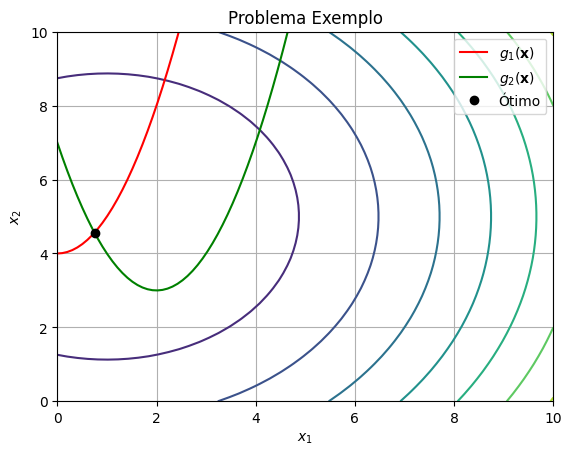

In [ ]:
# Parâmetros
precisao = 1e-4 # Precisão: percentual de diferença de x entre duas iterações
u = 1. # Valor inicial de u
alpha = 1.5 # Aceleração do valor de u
x0 = np.array([0, 0], dtype=float) # Ponto inicial
xlast = x0.copy() # Último valor de x
iteracoes = 1 # Contador de iterações

while True:
    
    # Define a nova função-objetivo
    def fh(x):
        fx = f(x)
        g1x = g1(x)
        g2x = g2(x)
        return fx + u * (max(0, g1x)**2 + max(0, g2x)**2)
    
    # Determina o ponto de ótimo através de um método de otimização irrestrita
    solution = optimize.minimize(fh, xlast, method='BFGS')
    xopt = solution.x
    fopt = solution.fun
    
    # Se o percentual de diferença entre os dois últimos ótimos forem muito pequenos, pare
    if np.linalg.norm((xopt-xlast)/xopt) < precisao:
        break
    
    # Senão, aumente u
    else:
        xlast = xopt
        u = alpha*u
        iteracoes += 1

# Exibe resultado
print('RESULTADO')
print('x-ótimo: ' + str(xopt))
print('Valor final de u: %.1f' % u)
print('Número de iterações: %d' % iteracoes)

# Definição da malha de pontos
x1, x2 = np.meshgrid(np.linspace(0, 10),
                     np.linspace(0, 10))

# Calcula f(x) e exibe gráfico de contorno
fx = np.zeros(x1.shape)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        fx[i, j] = f([x1[i, j], x2[i, j]])
plt.contour(x1, x2, fx)

# Calcula g1(x) e adiciona no gráfico
x1 = np.linspace(0, 10, 100)
x2 = 4+x1**2
plt.plot(x1, x2, 'r', label=r'$g_1(\mathbf{x})$')

# Calcula g2(x) e adiciona no gráfico
x2 = 3+(x1-2)**2
plt.plot(x1, x2, 'g', label=r'$g_2(\mathbf{x})$')

# Adiciona o ponto ótimo no gráfico
plt.plot(xopt[0], xopt[1], 'ko', label='Ótimo')

# Outros parâmetros da figura
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo')
plt.legend()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.grid()
plt.show()